In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel('cons_data_all_res.xlsx')

In [3]:
print(data.head())

                 Time  year  moy_date  doy_date  busday  season  dow_date   
0 2017-01-01 00:00:00  2017         1         1   False  Winter         1  \
1 2017-01-01 01:00:00  2017         1         1   False  Winter         1   
2 2017-01-01 02:00:00  2017         1         1   False  Winter         1   
3 2017-01-01 03:00:00  2017         1         1   False  Winter         1   
4 2017-01-01 04:00:00  2017         1         1   False  Winter         1   

   hour month_name  temp  ...      r3      r4      r5      r6      r7      r8   
0     0  January    22.0  ...  0.0821  0.0667  0.2131  0.0854  0.1277  0.2173  \
1     1  January    22.0  ...  0.0989  0.1047  0.1719  0.0948  0.1112  0.2411   
2     2  January    22.0  ...  0.0990  0.1001  0.1865  0.0978  0.1850  0.8316   
3     3  January    23.5  ...  0.1038  0.1354  0.1882  0.1064  0.0970  0.6645   
4     4  January    27.0  ...  0.0780  0.3508  0.2092  0.2456  0.1374  1.9451   

       r9     r10     r11     r12  
0  0.1478  0.1

In [4]:
columns_to_cluster = ['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12']
cluster_data = data[columns_to_cluster]

In [5]:
# Standardizing the data 
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

In [6]:
# Determining the optimal number of clusters (K) using the Elbow Plot
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
    kmeans.fit(cluster_data_scaled)
    inertia.append(kmeans.inertia_)

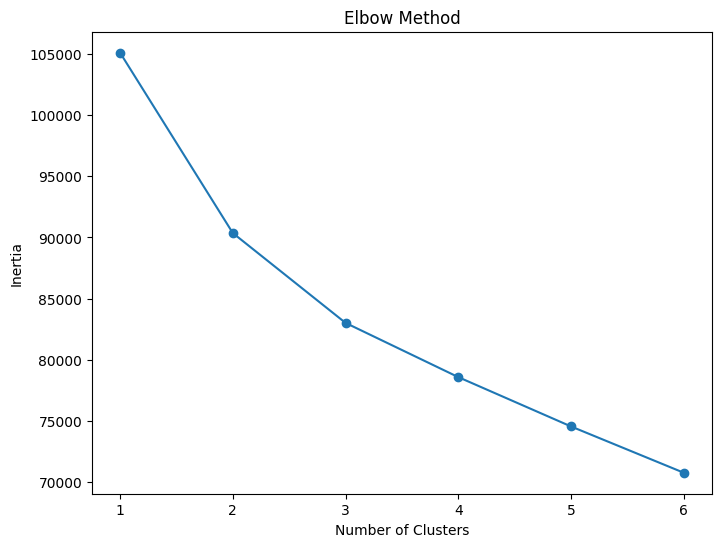

In [7]:
# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Applying K-means clustering
num_clusters = 2  
kmeans = KMeans(n_clusters=num_clusters, random_state=42,n_init=10)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)
cluster_centers = kmeans.cluster_centers_

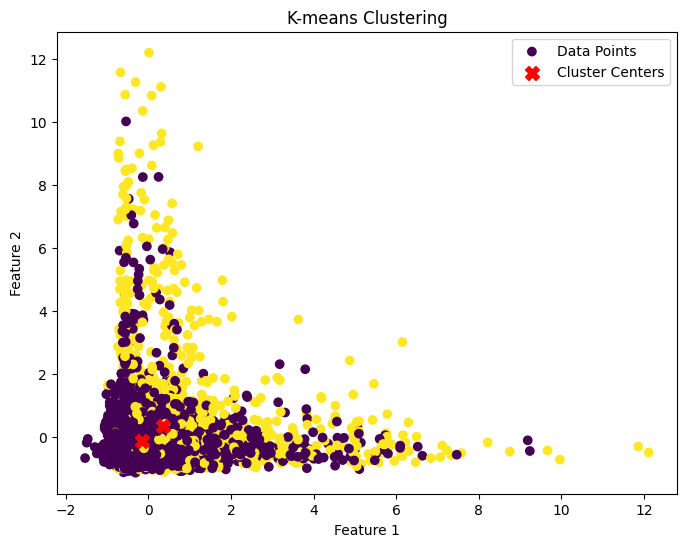

In [9]:
# Visualizing the clusters 
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data_scaled[:, 0], cluster_data_scaled[:, 1], c=cluster_labels, cmap='viridis', label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()